In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import cv2, os, gc, glob
from tqdm import tqdm
import random

from tensorflow.keras import layers, models

import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [22]:
os.listdir('/home/k/Documents/a')

['COVID',
 'Lung_Opacity.metadata.xlsx',
 'Normal.metadata.xlsx',
 'Viral Pneumonia',
 'Lung_Opacity',
 'Normal',
 'COVID.metadata.xlsx',
 'README.md.txt',
 'Viral Pneumonia.metadata.xlsx']

In [23]:
imagePaths = []
for dirname, _, filenames in os.walk('/home/k/Documents/a'):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            imagePaths.append(os.path.join(dirname, filename))

In [24]:
random.shuffle(imagePaths)

In [25]:

Data = []
Target = []
resize = 150

cat = {'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19',
       'Lung_Opacity': 'Lung Opacity'}

i = 0
for imagePath in tqdm(imagePaths):
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (resize, resize)) /255

    Data.append(image)
    Target.append(cat[label])
    i += 1
    
    # Taking only 3000 images
    if(i == 3000):
        break
print(len(Data))

 14%|█████████████████▋                                                                                                           | 2999/21165 [00:09<00:58, 308.94it/s]

3000


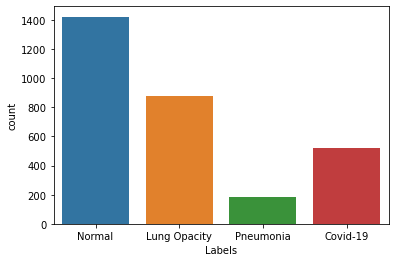

Normal: 1422
Lung Opacity: 875
Pneumonia:  183
Covid-19: 520


In [26]:

df = pd.DataFrame(Target,columns=['Labels'])
sns.countplot(df['Labels'])
plt.show()

print('Normal:',Target.count('Normal'))
print('Lung Opacity:',Target.count('Lung Opacity'))
print('Pneumonia: ',Target.count('Pneumonia'))
print('Covid-19:',Target.count('Covid-19'))

In [27]:
size = []
for file in imagePaths: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(299, 299)       21025
(299, 299, 3)      140
dtype: int64

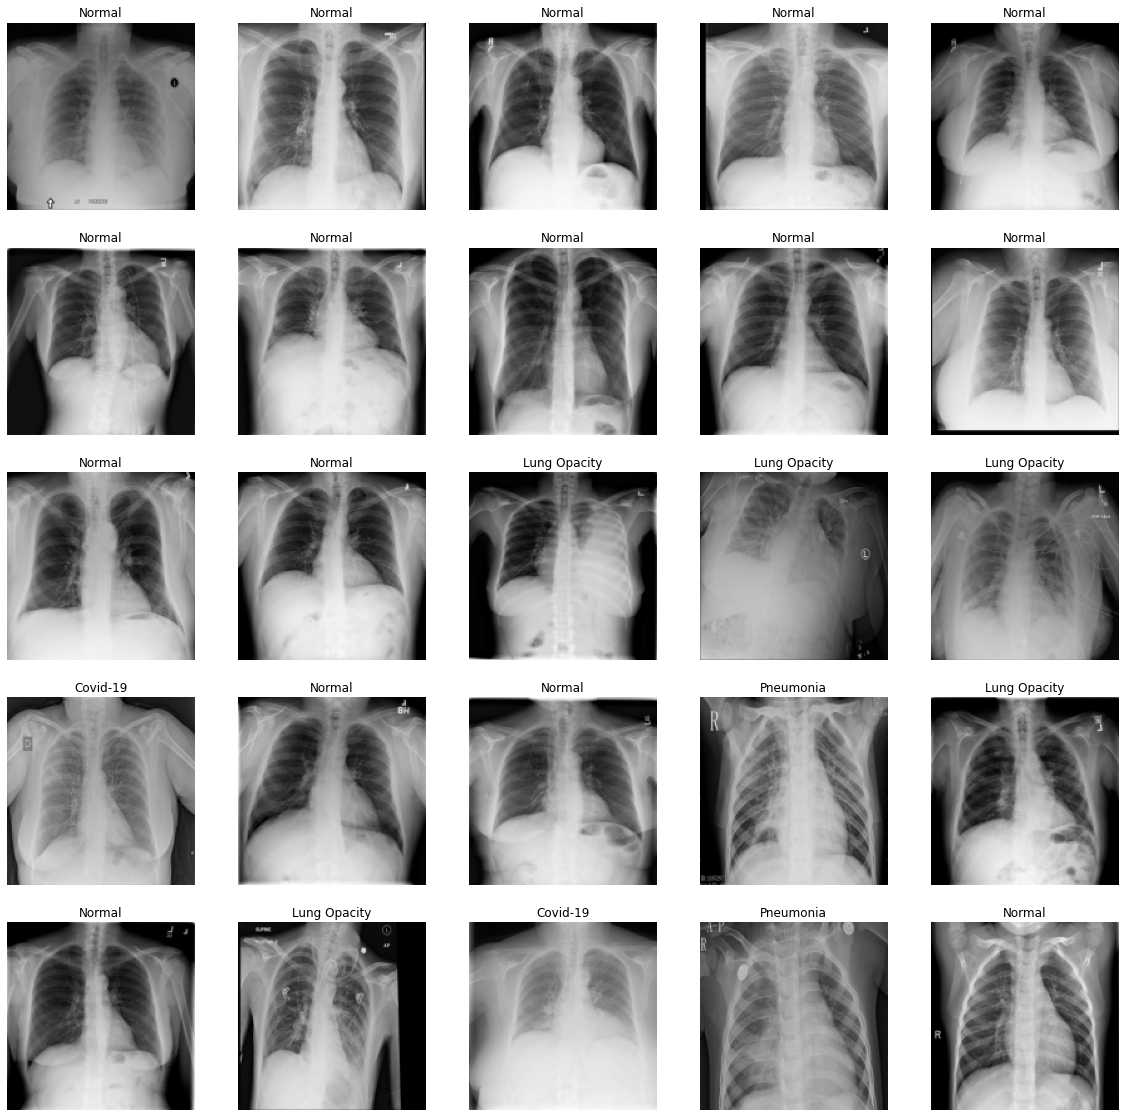

In [28]:
plt.figure(figsize=(20,20))
# for n , i in enumerate(list(np.random.randint(0,len(imagePaths),25))) : 
for n , i in enumerate(list(np.random.randint(0,3000,25))) : 
    plt.subplot(5,5,n+1)
    plt.imshow(Data[i] , cmap='gray')
    plt.title(Target[i])
    plt.axis('off')     
plt.show()

In [29]:

le = LabelEncoder()
labels = le.fit_transform(Target)
labels = to_categorical(labels)

print(le.classes_)
print(labels[0])

['Covid-19' 'Lung Opacity' 'Normal' 'Pneumonia']
[0. 0. 1. 0.]


In [101]:
def confusion_matrix(x_train, x_test):
 
 x_train=train_test_split(Data)
 x_test=train_test_split(labels)
 
 
 trainX = np.array(x_train)
 testX = np.array(x_test)
 
    
 


print(trainX.shape)
print(testX.shape)


(2400, 150, 150, 3)
(600, 150, 150, 3)


In [31]:
trainX[0]

array([[[0.00784314, 0.00784314, 0.00784314],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00784314, 0.00784314, 0.00784314],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0

In [32]:
s = 150

In [33]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size =(3,3), activation = "relu", input_shape=(s,s,3), kernel_initializer='he_normal',))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size =(3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size =(3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2), strides = (1,1)))

model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.2))
# model.add(Dense(3, activation = "softmax"))
# we have 4 classes
model.add(Dense(4, activation = "softmax"))

2021-12-23 08:11:47.736824: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:
2021-12-23 08:11:47.736878: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-23 08:11:47.736914: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kali): /proc/driver/nvidia/version does not exist
2021-12-23 08:11:47.737333: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [42]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(),loss= keras.losses.categorical_crossentropy,metrics= ['accuracy'])

In [43]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 33, 33, 128)      0

In [49]:
epochs = 30

ThisModel = model.fit(trainX, trainY, epochs=epochs, batch_size=40, verbose=1)

Epoch 1/30
60/60 [==============================] - 226s 4s/step - loss: 1.6937 - accuracy: 0.5412
Epoch 2/30
60/60 [==============================] - 207s 3s/step - loss: 0.7822 - accuracy: 0.6958
Epoch 3/30
60/60 [==============================] - 200s 3s/step - loss: 0.6660 - accuracy: 0.7346
Epoch 4/30
60/60 [==============================] - 197s 3s/step - loss: 0.5655 - accuracy: 0.7817
Epoch 5/30
60/60 [==============================] - 196s 3s/step - loss: 0.5107 - accuracy: 0.7996
Epoch 6/30
60/60 [==============================] - 206s 3s/step - loss: 0.4361 - accuracy: 0.8433
Epoch 7/30
60/60 [==============================] - 198s 3s/step - loss: 0.4022 - accuracy: 0.8521
Epoch 8/30
60/60 [==============================] - 195s 3s/step - loss: 0.3627 - accuracy: 0.8650
Epoch 9/30
60/60 [==============================] - 197s 3s/step - loss: 0.2978 - accuracy: 0.8896
Epoch 10/30
60/60 [==============================] - 205s 3s/step - loss: 0.2554 - accuracy: 0.9075
Epoch 11/

In [50]:
modelLoss, modelAccuracy = model.evaluate(testX, testY, verbose=0)

print('Test Loss is {}'.format(modelLoss))
print('Test Accuracy is {}'.format(modelAccuracy ))

Test Loss is 1.1082712411880493
Test Accuracy is 0.7683333158493042


In [51]:
class_names = ['COVID-19','Normal','Viral Pneumonia']

y_pred = model.predict(testX)
print(class_names[np.argmax(y_pred[1])])

Normal


In [52]:
batch_size=40

predIdxs = model.predict (trainX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

              precision    recall  f1-score   support

    Covid-19    0.96963   0.99760   0.98341       416
Lung Opacity    0.99286   0.99286   0.99286       700
      Normal    0.99645   0.98770   0.99206      1138
   Pneumonia    0.99306   0.97945   0.98621       146

    accuracy                        0.99042      2400
   macro avg    0.98800   0.98940   0.98863      2400
weighted avg    0.99055   0.99042   0.99044      2400



In [53]:
predIdxs = model.predict(testX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

              precision    recall  f1-score   support

    Covid-19    0.68852   0.80769   0.74336       104
Lung Opacity    0.75472   0.68571   0.71856       175
      Normal    0.80212   0.79930   0.80071       284
   Pneumonia    0.83333   0.81081   0.82192        37

    accuracy                        0.76833       600
   macro avg    0.76967   0.77588   0.77114       600
weighted avg    0.77053   0.76833   0.76812       600



In [77]:
from sklearn.ensemble import RandomForestClassifier

/tmp/ipykernel_26180/3598644431.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  trainX = np.array(x_train)
/tmp/ipykernel_26180/3598644431.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  testX = np.array(x_test)


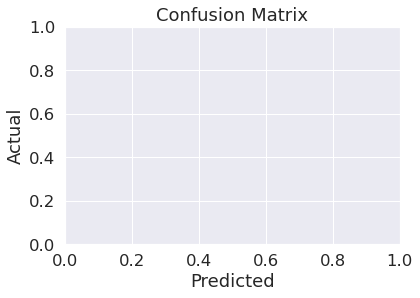

In [109]:
x = confusion_matrix(testY.argmax(axis=1),y_pred.argmax(axis=1))
Confusion_Matrix = pd.DataFrame(x, index=class_names, columns=class_names)

sns.set(font_scale=1.5, color_codes=True, palette='deep')


plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title('Confusion Matrix')
plt.show()

In [56]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [103]:
model.save('CNN_Covid19_Xray_V1.h5') 